# Vectorized operations and label alignment with Series

##  label alignment

1. A key difference between Series and ndarray is
   that operations between Series automatically align the data based on label.
   Thus, you can write computations without giving consideration to
   whether the Series involved have the same labels.
2. The result of an operation between unaligned Series
   will have the union of the indexes involved.
   If a label is not found in one Series or the other,
   the result will be marked as missing **NaN**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 k i random 1 random 2
 0 a 0.129308 0.090282
 1 b 0.200171 0.801658
 2 c 0.396248 0.737243
 3 d 0.030398 0.459409
 4 e 0.186039 0.528743
 5 f 0.552487 0.845891
 6 g 0.010090 0.198413
 7 h 0.515082 0.187346
 8 i 0.044965 0.558857
 9 j 0.346419 0.360885
10 k 0.246256 0.619490


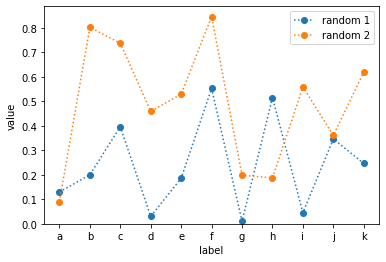

In [2]:
# Create the list of series from random 2D ndarray,
# when an index is passed.

i = list('abcdefghijk')
a = np.random.rand(2, len(i))

s = []
for k in range(a.shape[0]):
    s.append(pd.Series(a[k], index=i, name=f'random {k + 1}'))

print('{:>2}{:>2}{:>9}{:>9}'.
      format('k', 'i', s[0].name, s[1].name))
for k in range(s[0].size):
    print('{:>2}{:>2}{:>9.6f}{:>9.6f}'.
          format(k, s[0].index[k], s[0][k], s[1][k]),
          sep='')

for x in s:
    plt.plot(x, 'o:', label=x.name)
plt.ylim(ymin=0)
plt.xlabel(xlabel='label')
plt.ylabel(ylabel='value')
plt.legend()
plt.show()

[[3 6]
 [3 7]]
  k  i  random 1  random 2  random +  random -
  0  a  0.129308  0.090282       nan       nan
  1  b  0.200171  0.801658       nan       nan
  2  c  0.396248  0.737243       nan       nan
  3  d  0.030398  0.459409  0.489807 -0.429011
  4  e  0.186039  0.528743  0.714782 -0.342705
  5  f  0.552487  0.845891  1.398378 -0.293404
  6  g  0.010090  0.198413       nan -0.188323
  7  h  0.515082  0.187346       nan       nan
  8  i  0.044965  0.558857       nan       nan
  9  j  0.346419  0.360885       nan       nan
 10  k  0.246256  0.619490       nan       nan


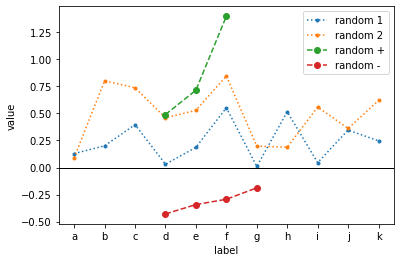

In [9]:
# Apply arithmetic operations:
# addition and subtraction,
# to slices of series.

# generate random indeces setting slices    
j = [np.random.randint(low=1, high=s[0].size // 2, size=2),
     np.random.randint(low=s[0].size // 2, high=s[0].size, size=2)]
j = np.array(j)
j = np.transpose(j)

# make arithmetic operations with slices of series 
s_1 =[s[0][j[0, 0]:] + s[1][:j[0, 1]],
      s[0][j[1, 0]:] - s[1][:j[1, 1]]]
s_1[0] = s_1[0].rename('random +')
s_1[1] = s_1[1].rename('random -')

print('{:>3}{:>3}{:>10}{:>10}{:>10}{:>10}'.
      format('k', 'i', s[0].name, s[1].name, s_1[0].name, s_1[1].name))
for k in range(s[0].size):
    print('{:>3}{:>3}{:>10.6f}{:>10.6f}{:>10.6f}{:>10.6f}'.
          format(k, s[0].index[k], s[0][k], s[1][k], s_1[0][k], s_1[1][k]),
          sep='')

for x in s:
    plt.plot(x, '.:', label=x.name)
for x in s_1:
    plt.plot(x, 'o--', label=x.name)
plt.axhline(y=0, linewidth=1, color='k')
plt.xlabel(xlabel='label')
plt.ylabel(ylabel='value')
plt.legend()
plt.show()